In [23]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [24]:
with h5py.File('../data/chease/ns128/topovisdata-0-0.h5') as f:
    R = f['R'][()]
    Z = f['Z'][()]
    POT = f['Poten'][()]
    S = f['s'][()]
    X = f['x'][()]

nx = len(S)
ns = len(X)

r2d = np.reshape(R, (nx, ns))
z2d = np.reshape(Z, (nx, ns))
pot2d = np.reshape(POT, (nx, ns))

-0.01171875
-0.00390625
0.00390625
0.01171875


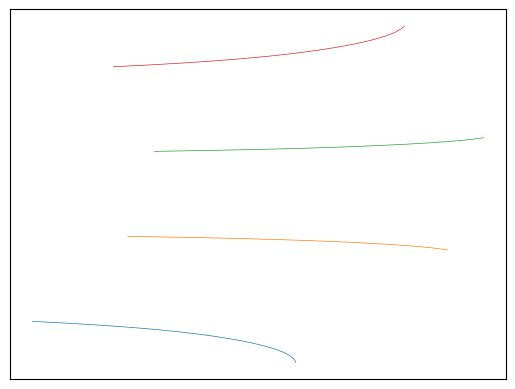

In [25]:
fig, ax = plt.subplots()

for i in range(62,66):
    ax.plot(np.ravel(r2d[:, i]), np.ravel(z2d[:, i]), linewidth=0.5)
    print(S[i])


ax.set_xticks([])
ax.set_yticks([])
#ax.set_aspect('equal')

plt.savefig('../figs/chease_geometry.svg')


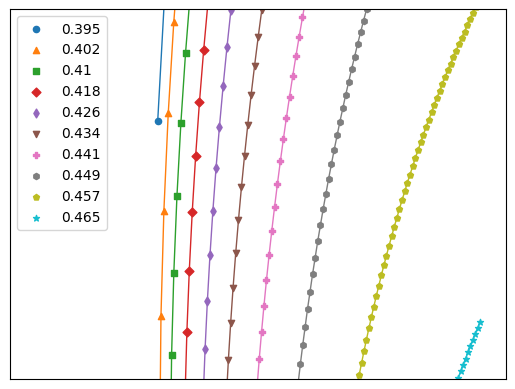

In [26]:

plt.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.ylim(0.015, 0.045)
plt.xlim(0.645, 0.67)

markers = ['o', '^', 's', 'D', 'd', 'v', 'P', 'h', 'p', '*']

for i in range(114, 124):
    plt.scatter(np.ravel(r2d[:, i]), np.ravel(z2d[:, i]), marker=markers[i-114], s=20, label=f"{round(S[i], 3)}")
    plt.plot(np.ravel(r2d[:, i]), np.ravel(z2d[:, i]), linewidth=1)

plt.legend()

plt.savefig("../figs/chease_geometry/shearing.svg")

In [27]:
x1 = 20
s1 = 120

x2 = 20
s2 = 121

print(r2d[x1, s1], z2d[x1, s1])
print(r2d[x2, s2], z2d[x2, s2])

print(X[x1], X[x2])
print(S[s1], S[s2])

0.6690694 0.09218785
0.6671766 0.06452321
0.29224624462365667 0.29224624462365667
0.44140625 0.44921875


In [28]:
with h5py.File('../data/chease/ns128/topovis_data.h5') as f:
    zeta_s = f['zeta_s'][()]
    q = f['q'][()]
    nx = int(f['nx'][()])
    ns = int(f['ns'][()])

zeta = np.reshape(zeta_s, (nx, ns))

diffs = zeta[:, -1] - zeta[:, 0]
